<a href="https://colab.research.google.com/github/Long-1234kfgkl/CS114.K21/blob/master/round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import thư viện

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

load data từ link"http://cs.uit.edu.vn/data3.txt"
Đặt 2 column là Size và Time

In [0]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data3.txt",sep=' ',delimiter=',')
dataset.columns=["Size","Time"]

in ra số cột và hàng của dataset

In [0]:
dataset.shape

(10589, 2)

In ra một số cặp data,label

In [0]:
dataset.head()

,Size,Time
0,37395246,3.92089
1,36610827,3.21540
2,29555651,2.54506
3,25928216,2.21831
4,30423112,2.61376


Bảng thống kê dataset ta đưa vào

In [0]:
dataset.describe()

,Size,Time
count,1.058900e+04,10589.000000
mean,2.999203e+07,2.642672
std,5.759148e+06,0.537139
min,2.000026e+07,1.669640
25%,2.503760e+07,2.180550
50%,2.994401e+07,2.639820
75%,3.500653e+07,3.100140
max,3.999734e+07,4.287660


Biểu diễn các điểm là mối liên hệ giữa 2 feature Size và Time (BIỂU ĐỒ)

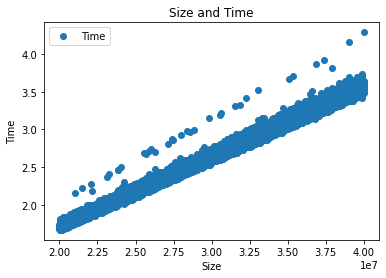

In [0]:
dataset.plot (x = 'Size', y = 'Time', style = 'o')
plt.title ( 'Size and Time')   
plt.xlabel ( 'Size')   
plt.ylabel ( 'Time') 
plt.show()

 đưa 2 feature Size và Time vào các biến X và y (đã được biến thàng dạng vector 1 chiều)

In [0]:
X = dataset['Size'].values.reshape(-1,1)
y = dataset['Time'].values.reshape(-1,1)

chia bộ dữ liệu thành 2 bộ, 80% cho training, 20% cho test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
Chọn model là LinearRegression
Fit model

In [0]:
regressor = LinearRegression(fit_intercept=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict dữ liệu

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
Bảng hai giá trị thực và giá trị đã dự đoán

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2.39698,2.475410
1,2.66026,2.706579
2,2.75597,2.751995
3,2.90832,2.859758
4,1.94031,1.990079
...,...,...
2113,2.13180,2.136571
2114,2.19643,2.200919
2115,2.36696,2.440459
2116,2.46800,2.437054


Biểu đồ biễu diển 2 giá trị thực sự và dự đoán

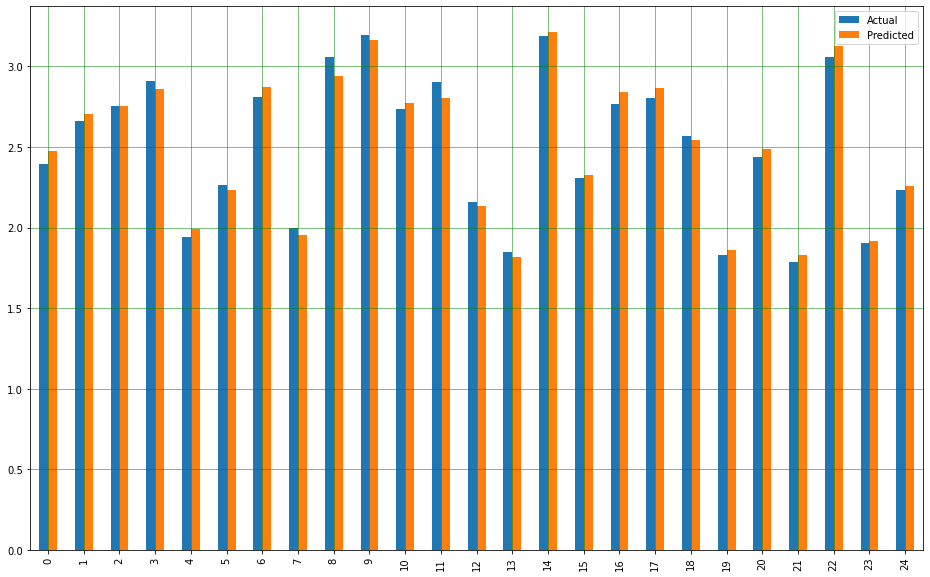

In [0]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In ra biểu đồ hàm ánh xạ trên biểu đồ Size and Time

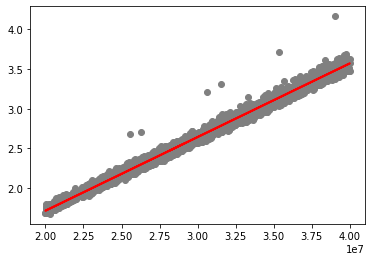

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In ra:
dòng 1 MSQ: lỗi bình phương góc
,dòng 2 : độ chính xác trong huấn luyện train
,dòng 3 : độ chính xác trong huấn luyện test




In [0]:
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

Mean Squared Error: 0.003313862329617691
0.9884041146952219
0.9881646990079122
